This crashed when I tried it in a py-file, which is why it's here

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_parquet("../data/rixvox-alignments.parquet")
head = df.head()

head.columns


Index(['speech_id', 'protocol_id', 'speech_number', 'dates', 'name',
       'person_id', 'speaker_id', 'riksdagen_id', 'party', 'district', 'role',
       'gender', 'start_segment', 'end_segment', 'duration_segment', 'text',
       'text_normalized', 'transcription_w2v', 'start_text_time',
       'end_text_time', 'born', 'dead', 'bleu_score', 'overall_score',
       'nr_speech_segments', 'start_segment_same', 'audio_file'],
      dtype='object')

In [4]:
df = df[["protocol_id", "name", "party", "gender", "start_segment", "end_segment", "text"]]
df = df[df["protocol_id"] == "prot-1966--ak--25"]
df.fillna("unknown", inplace=True)

df

,protocol_id,name,party,gender,start_segment,end_segment,text
0,prot-1966--ak--25,Gunnar Sträng,Socialdemokraterna,man,858.565365,940.874363,"Herr talman! Herr Nihlfors har frågat, om jag ..."
1,prot-1966--ak--25,Folke Nihlfors,Folkpartiet,man,946.680815,1042.996604,Herr talman! Jag får tacka för det mycket posi...
2,prot-1966--ak--25,Manne Ståhl,Folkpartiet,man,1128.242784,1251.010187,Herr talman! Jag ber att få tacka för svaret s...
3,prot-1966--ak--25,Gunnar Lange,Socialdemokraterna,man,1262.232598,1304.694397,Herr talman! Herr Fridolfsson i Stockholm har ...
4,prot-1966--ak--25,Filip Fridolfsson,Moderaterna,man,1307.852292,1461.994907,Herr talman! Jag ber att få tacka handelsminis...
...,...,...,...,...,...,...,...
150,prot-1966--ak--25,Astrid Kristensson,"Moderaterna, Högerpartiet",woman,7521.519525,7574.219015,Herr talman! Bara ett par ord med anledning av...
151,prot-1966--ak--25,Carl-Eric Hedin,Moderaterna,man,7600.738540,8071.332767,"Herr talman! I motion II: 888, likalydande med..."
152,prot-1966--ak--25,Sten Sjöholm,"Liberalerna, Folkpartiet",man,8079.567063,8321.910017,Herr talman! Jag måste först säga några ord ti...
153,prot-1966--ak--25,Astrid Bergegren,Socialdemokraterna,woman,8336.680815,8765.764007,Herr talman! Jag skulle i likhet med fru Krist...


In [5]:
df.to_csv("../data/filtered_riksdag.csv", index=False)


In [ ]:
filter_df = pd.read_csv("../data/filtered_riksdag.csv")

/mnt/c/Users/User/thesis/data_import/experimental


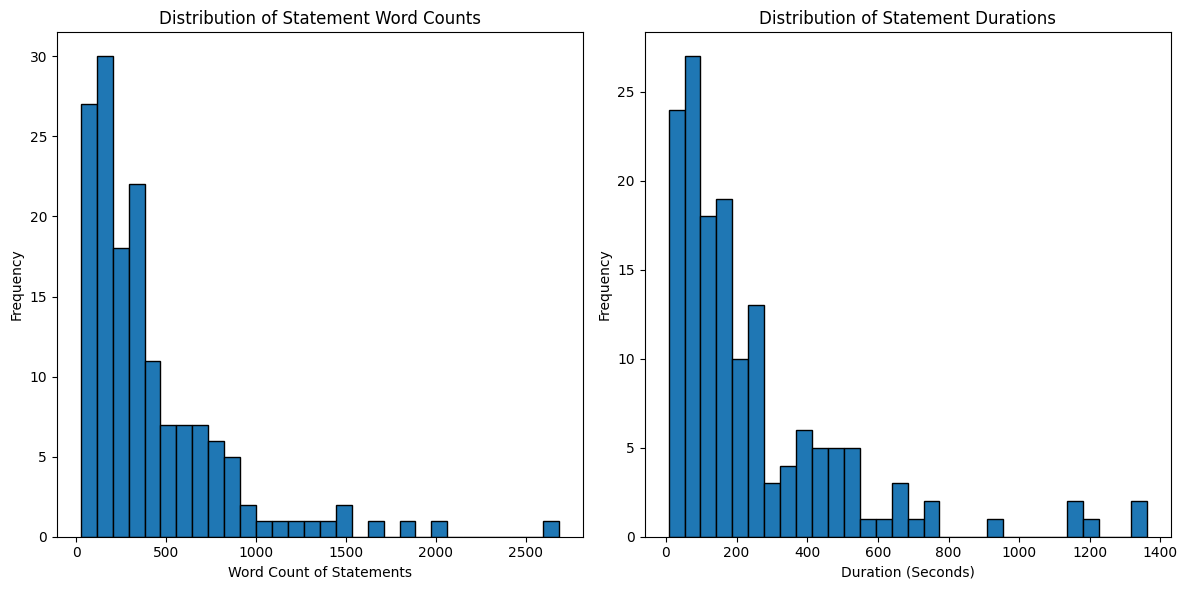

Average word count per statement: 416.8169934640523
Standard deviation of word counts: 414.40949487935774
Average duration per statement: 245.38766270514995 seconds
Standard deviation of durations: 258.97771369896213 seconds


In [11]:

# Word counts
filter_df['word_count'] = filter_df['text'].apply(lambda x: len(x.split()))
average_word_count = filter_df['word_count'].mean()
std_dev_word_count = filter_df['word_count'].std()

# Duration
filter_df['duration'] = filter_df['end_segment'] - filter_df['start_segment']
average_duration = filter_df['duration'].mean()
std_dev_duration = filter_df['duration'].std()


fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

axes[0].hist(filter_df['word_count'], bins=30, edgecolor='black')
axes[0].set_title("Distribution of Statement Word Counts")
axes[0].set_xlabel("Word Count of Statements")
axes[0].set_ylabel("Frequency")

axes[1].hist(filter_df['duration'], bins=30, edgecolor='black')
axes[1].set_title("Distribution of Statement Durations")
axes[1].set_xlabel("Duration (Seconds)")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

print(f"Average word count per statement: {average_word_count}")
print(f"Standard deviation of word counts: {std_dev_word_count}")
print(f"Average duration per statement: {average_duration} seconds")
print(f"Standard deviation of durations: {std_dev_duration} seconds")

## Fix nan values:
If there are empty fields, add dummy value.